In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_data = pd.read_csv("data/transaction_dataset.csv")
print(transaction_data.shape)
transaction_data = transaction_data.dropna()
categorical_data = transaction_data[[" ERC20 most sent token type", " ERC20_most_rec_token_type"]]
num_dummy_vars = len(categorical_data[" ERC20 most sent token type"].unique()) + len(categorical_data[" ERC20_most_rec_token_type"].unique())
print(num_dummy_vars)
categorical_data

(9841, 51)
772


,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9832,,Blockwell say NOTSAFU
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com


Percentage of Fraud Transactions:  15.03 %
Percentage of Non-Fraud Transactions:  84.97 %
Number of Fraud Transactions:  1350
Number of Non-Fraud Transactions:  7631


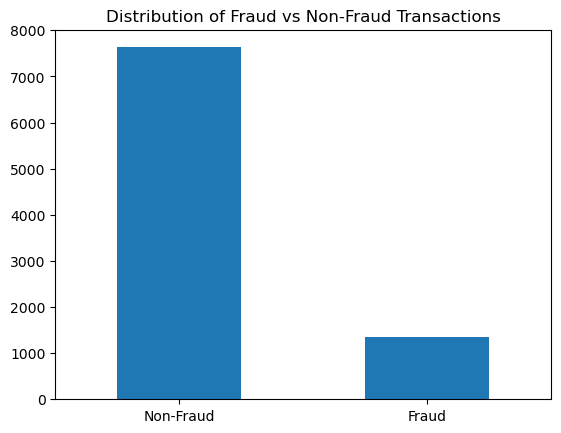

In [3]:
#plot distribution of fraud vs non-fraud transactions
transaction_data["FLAG"].value_counts().plot(kind='bar')
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
#reanme x label ticks
plt.xticks([0,1], ["Non-Fraud", "Fraud"], rotation=0)

#print percentage of fraud vs non-fraud transactions
print("Percentage of Fraud Transactions: ", round(transaction_data["FLAG"].value_counts()[1]/len(transaction_data) * 100,2), "%")
print("Percentage of Non-Fraud Transactions: ", round(transaction_data["FLAG"].value_counts()[0]/len(transaction_data) * 100,2), "%")

#print number of fraud vs non-fraud transactions
print("Number of Fraud Transactions: ", transaction_data["FLAG"].value_counts()[1])
print("Number of Non-Fraud Transactions: ", transaction_data["FLAG"].value_counts()[0])

In [4]:
fraud_labels = transaction_data['FLAG']
#select columns 4 and above
features = transaction_data.iloc[:,4:-2]
display(features.describe())

#one hot encode categorical features ERC20 most sent token time and ERC20 most received token time
# features = pd.get_dummies(features, columns=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'])

display(features)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,8981.000000,8981.000000,8.981000e+03,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,...,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8981.0,8981.0,8981.0,8981.000000,8981.000000
mean,5385.044197,8262.279914,2.342820e+05,122.359091,172.650150,4.068812,31.251420,26.826634,47.456209,571.657857,...,1.255114e+08,4.336482e+06,1.178169e+04,1.308093e+07,6.340198e+06,0.0,0.0,0.0,1.386260,4.818283
std,22149.013489,23416.048804,3.308771e+05,769.388029,960.891404,148.059251,301.747425,257.397328,336.858127,13616.372499,...,1.055557e+10,2.144761e+08,1.055384e+06,1.181940e+09,5.924963e+08,0.0,0.0,0.0,6.746451,16.696803
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.211200e+02,1.000000,2.000000,0.000000,1.000000,1.000000,0.003000,1.018356,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,21.510000,753.520000,6.905013e+04,3.000000,5.000000,0.000000,2.000000,2.000000,0.100000,8.360000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,744.000000,5868.390000,3.228930e+05,13.000000,30.000000,0.000000,5.000000,3.000000,3.150000,78.798212,...,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,6711.000000,10000.000000,800000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9836,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,...,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9837,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0
9838,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,...,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0


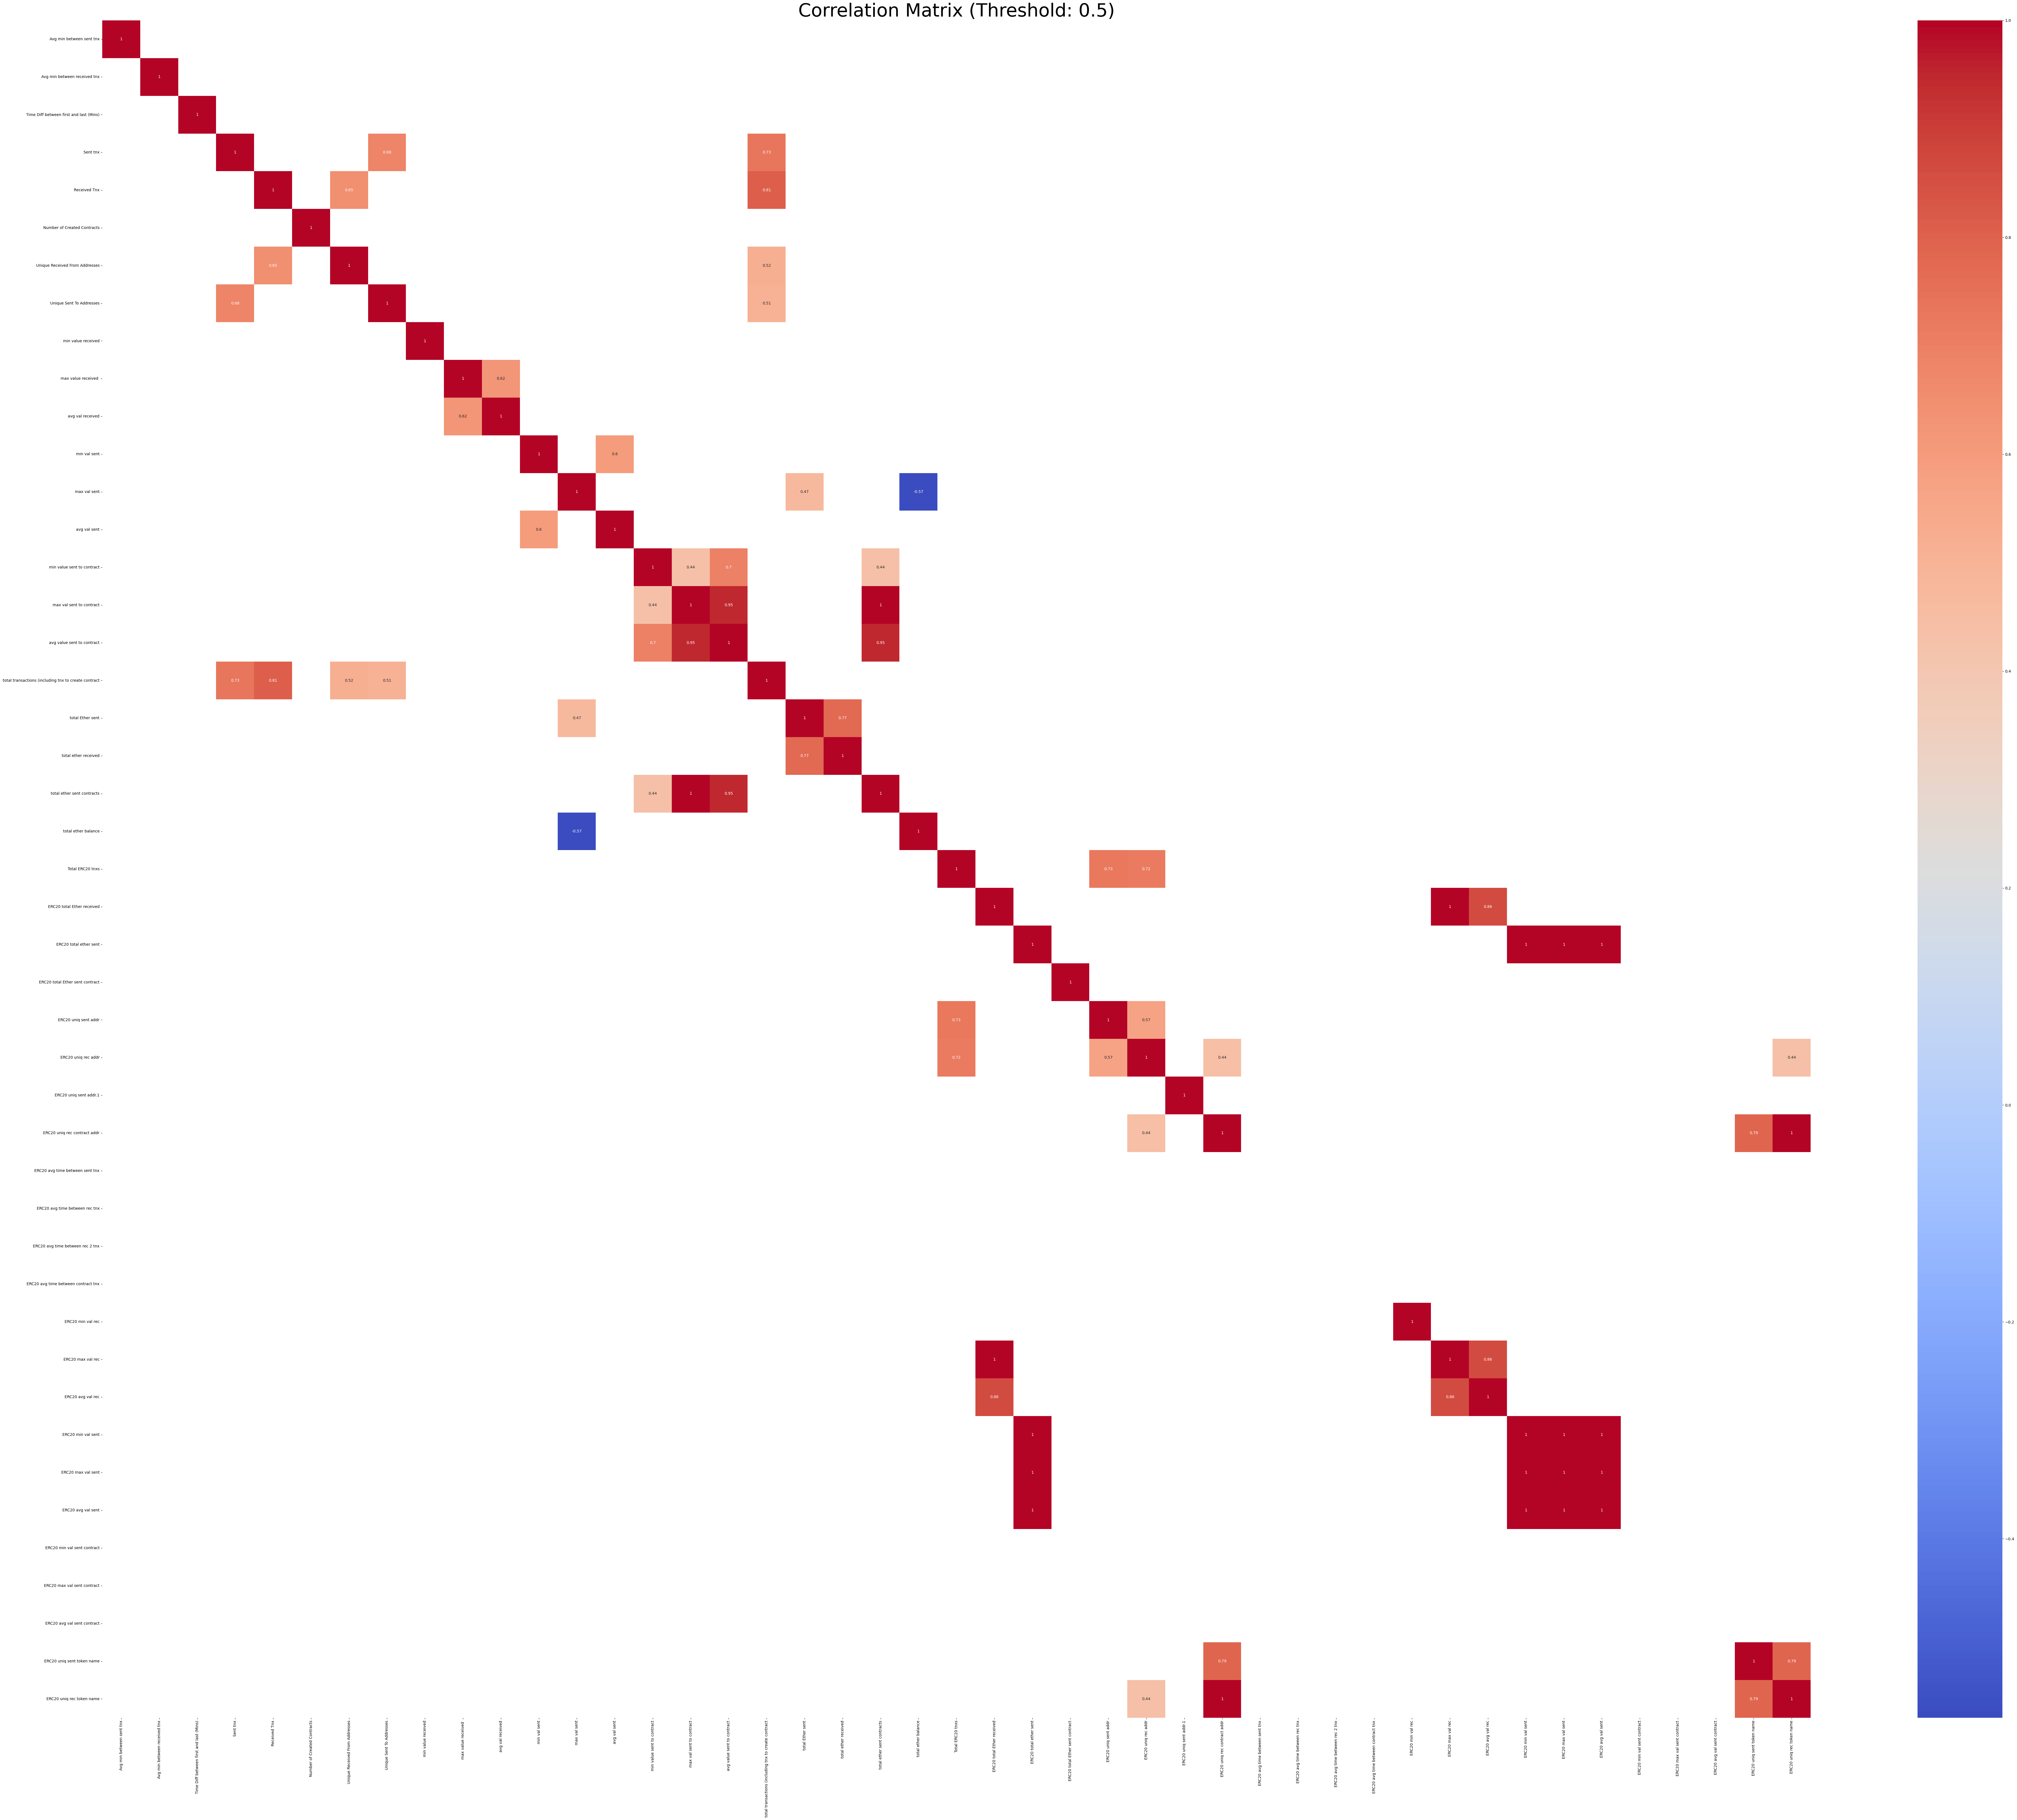

In [5]:
import matplotlib
#plot correlation matrix of features
corr_matrix = features.corr()
high_corr = corr_matrix[corr_matrix.abs() > 0.4]

# Plot correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
original_font_size = matplotlib.rcParams['font.size']
matplotlib.rcParams['font.size'] = 40

plt.title("Correlation Matrix (Threshold: 0.5)")
plt.show()
matplotlib.rcParams['font.size'] = original_font_size

Text(0.5, 1.0, 'Correlation Matrix (Threshold: 0.5)')

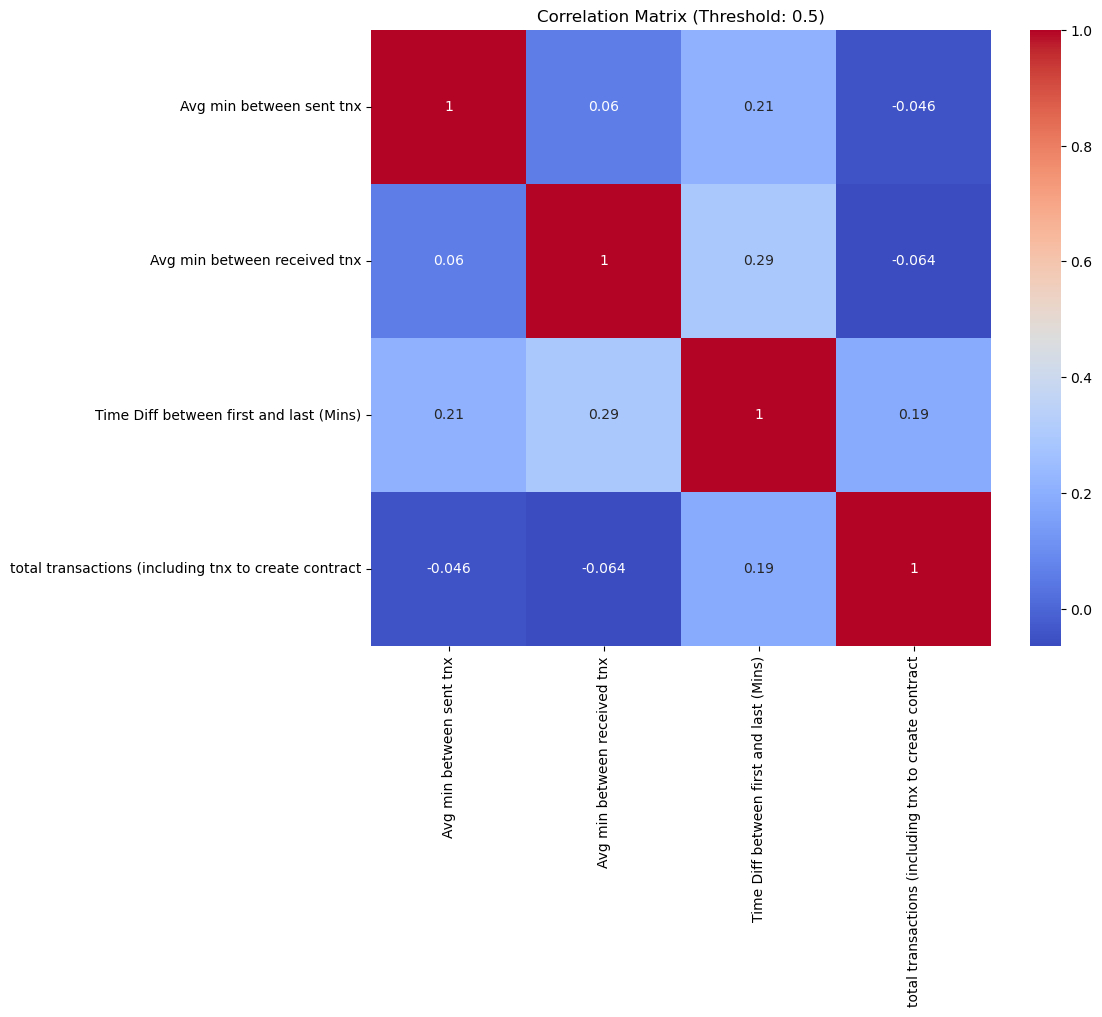

In [95]:
#correlation between avg time betweent sent and received transactions, time between first and last transaction, and number of transactions
# List of features of interest
corr_matrix = features.corr()
high_corr = corr_matrix[corr_matrix.abs() > 0]
features_of_interest = ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract']

# Subset the correlation matrix
subset_high_corr = high_corr.loc[features_of_interest, features_of_interest]

# Plot subset of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(subset_high_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


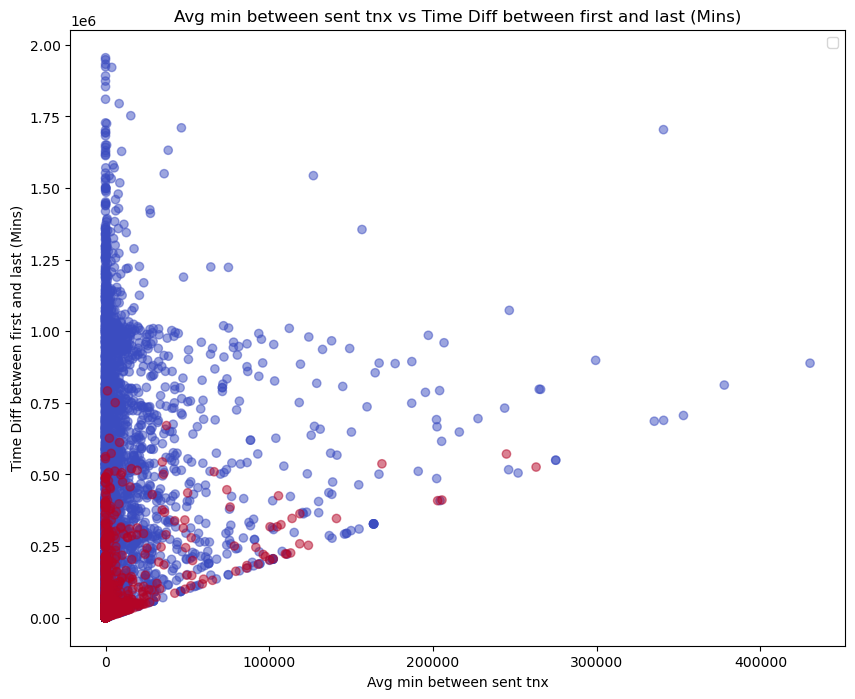

In [97]:
#plot scatter plot of avg time between sent and received transactions vs time between first and last transaction
plt.figure(figsize=(10, 8))
plt.scatter(features['Avg min between sent tnx'], features['Time Diff between first and last (Mins)'], c=fraud_labels, cmap='coolwarm', alpha=0.5)
plt.xlabel('Avg min between sent tnx')
plt.ylabel('Time Diff between first and last (Mins)')
plt.title("Avg min between sent tnx vs Time Diff between first and last (Mins)")
plt.legend()
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Number of features: " + str(len(features.columns)))

X_train, X_test, y_train, y_test = train_test_split(features, fraud_labels, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_predictions)

print(accuracy_rf)

Number of features: 45
0.9760712298274903


In [7]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_predictions = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, xgb_predictions)

print(accuracy_xgb)

0.9833055091819699


In [8]:
from sklearn.feature_selection import SelectFromModel

sel_rf = SelectFromModel(rf)
sel_rf.fit(X_train, y_train)

sel_xgb = SelectFromModel(xgb_clf)
sel_xgb.fit(X_train, y_train)

sel_rf.get_support()
sel_xgb.get_support()

selected_feat_rf= X_train.columns[(sel_rf.get_support())]
selected_feat_xgb= X_train.columns[(sel_xgb.get_support())]

print("No. of Selected Features by Random Forest: ", len(selected_feat_rf))
print("No. of Selected Features by XGBoost: ", len(selected_feat_xgb))

print("RF Selected Features: ", selected_feat_rf)
print("XGBoost Selected Features: ", selected_feat_xgb)

No. of Selected Features by Random Forest:  15
No. of Selected Features by XGBoost:  10
RF Selected Features:  Index(['Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Received Tnx',
       'Unique Received From Addresses', 'min val sent',
       'total transactions (including tnx to create contract',
       'total ether received', ' Total ERC20 tnxs',
       ' ERC20 total Ether received', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 uniq rec token name'],
      dtype='object')
XGBoost Selected Features:  Index(['Time Diff between first and last (Mins)', 'Sent tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'total transactions (including tnx to create contract',
       'total ether received', ' Total ERC20 tnxs', ' ERC20 total ether sent',
       ' ERC20 min val rec', ' ERC20 uniq sent token name'],
      dtype=

<Axes: title={'center': 'XGBoost Feature Importance'}>

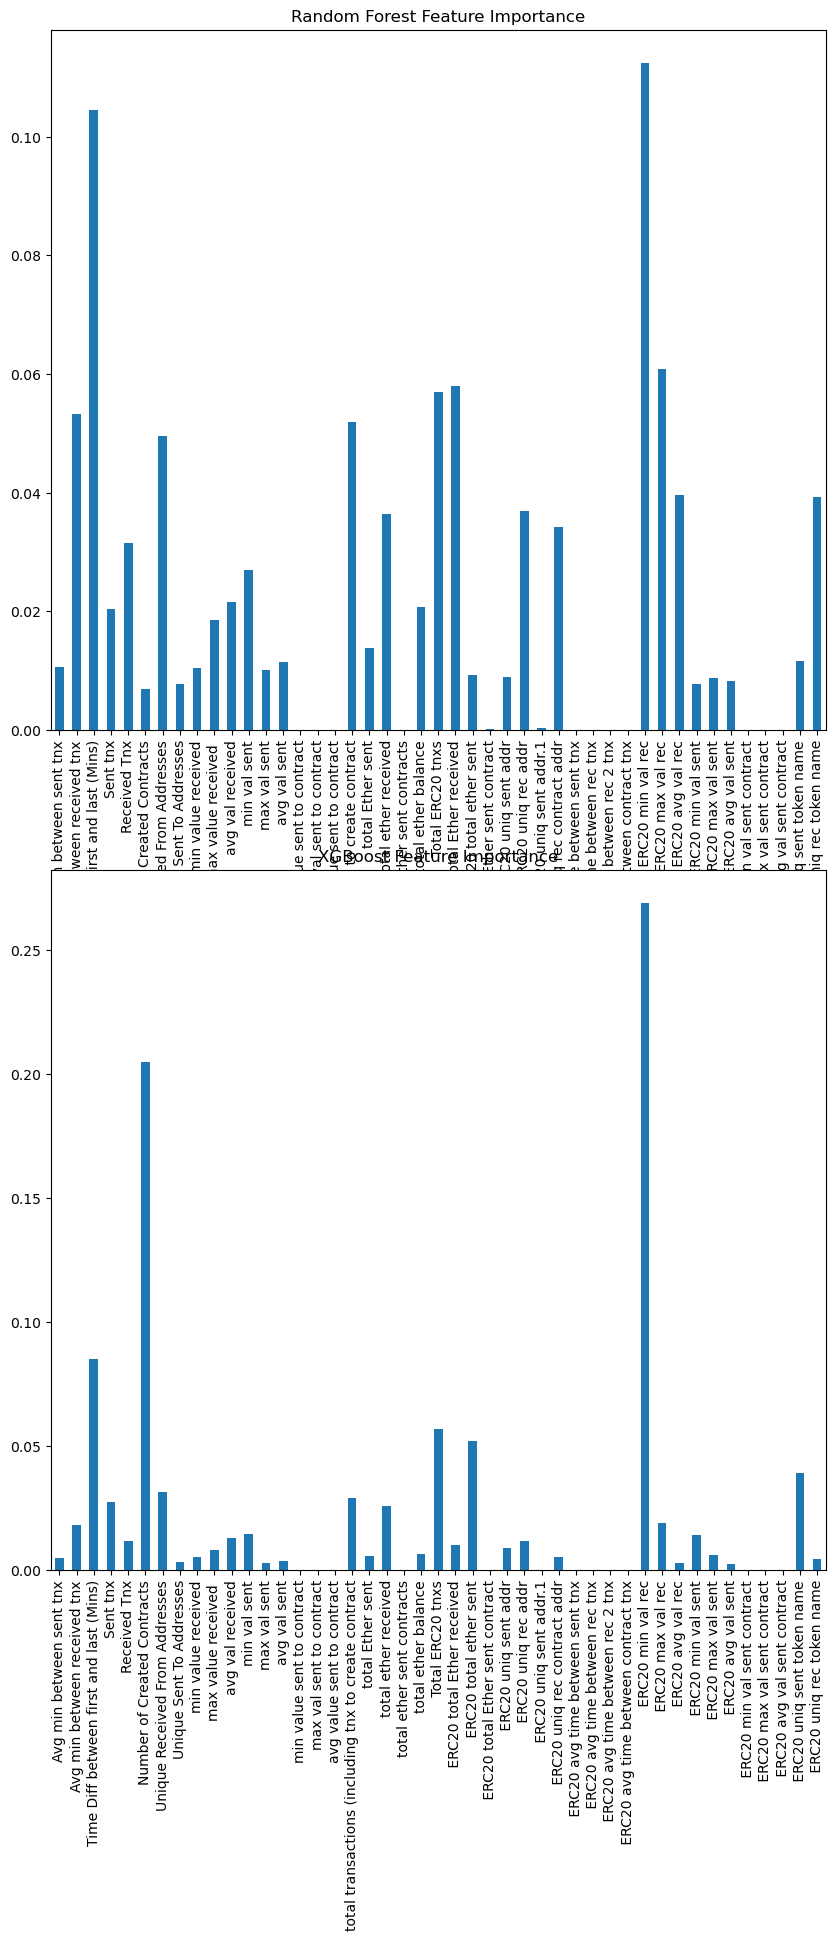

In [9]:
# pd.Series(rf.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,10))

fig, ax = plt.subplots(2,figsize=(20,60))
pd.Series(sel_rf.estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,20), ax=ax[0], title="Random Forest Feature Importance")
pd.Series(sel_xgb.estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,20), ax=ax[1], title="XGBoost Feature Importance")

In [23]:
rf_sub_features = features[selected_feat_rf]
xgb_sub_features = features[selected_feat_xgb]

X_rfsub_train, X_rfsub_test, y_rfsub_train, y_rfsub_test = train_test_split(rf_sub_features, fraud_labels, test_size=0.2, random_state=42)
X_xgbsub_train, X_xgbsub_test, y_xgbsub_train, y_xgbsub_test = train_test_split(xgb_sub_features, fraud_labels, test_size=0.2, random_state=42)

rf_sub = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_sub.fit(X_rfsub_train, y_rfsub_train)
rf_sub_predictions = rf_sub.predict(X_rfsub_test)
accuracy_rf_sub = accuracy_score(y_rfsub_test, rf_sub_predictions)
print("Random Forest All Features Accuracy: " + str(accuracy_rf))
print("Random Forest Sub Features Accuracy: " + str(accuracy_rf_sub))

xgb_sub = XGBClassifier()
xgb_sub.fit(X_xgbsub_train, y_xgbsub_train)
xgb_sub_predictions = xgb_sub.predict(X_xgbsub_test)
accuracy_xgb_sub = accuracy_score(y_xgbsub_test, xgb_sub_predictions)
print("XGBoost All Features Accuracy: " + str(accuracy_xgb))
print("XGBoost Sub Features Accuracy: " + str(accuracy_xgb_sub))


Random Forest All Features Accuracy: 0.9760712298274903
Random Forest Sub Features Accuracy: 0.9777406789092933
XGBoost All Features Accuracy: 0.9833055091819699
XGBoost Sub Features Accuracy: 0.9827490261547023


In [11]:
rf_sub_f1 = f1_score(y_rfsub_test, rf_sub_predictions)
rf_sub_recall = recall_score(y_rfsub_test, rf_sub_predictions)
rf_sub_precision = precision_score(y_rfsub_test, rf_sub_predictions)

xgb_sub_f1 = f1_score(y_xgbsub_test, xgb_sub_predictions)
xgb_sub_recall = recall_score(y_xgbsub_test, xgb_sub_predictions)
xgb_sub_precision = precision_score(y_xgbsub_test, xgb_sub_predictions)

print("Random Forest Sub Features F1 Score: " + str(rf_sub_f1))
print("Random Forest Sub Features Recall Score: " + str(rf_sub_recall))
print("Random Forest Sub Features Precision Score: " + str(rf_sub_precision))

print("XGBoost Sub Features F1 Score: " + str(xgb_sub_f1))
print("XGBoost Sub Features Recall Score: " + str(xgb_sub_recall))
print("XGBoost Sub Features Precision Score: " + str(xgb_sub_precision))

Random Forest Sub Features F1 Score: 0.9233716475095787
Random Forest Sub Features Recall Score: 0.8925925925925926
Random Forest Sub Features Precision Score: 0.9563492063492064
XGBoost Sub Features F1 Score: 0.9418386491557224
XGBoost Sub Features Recall Score: 0.9296296296296296
XGBoost Sub Features Precision Score: 0.9543726235741445


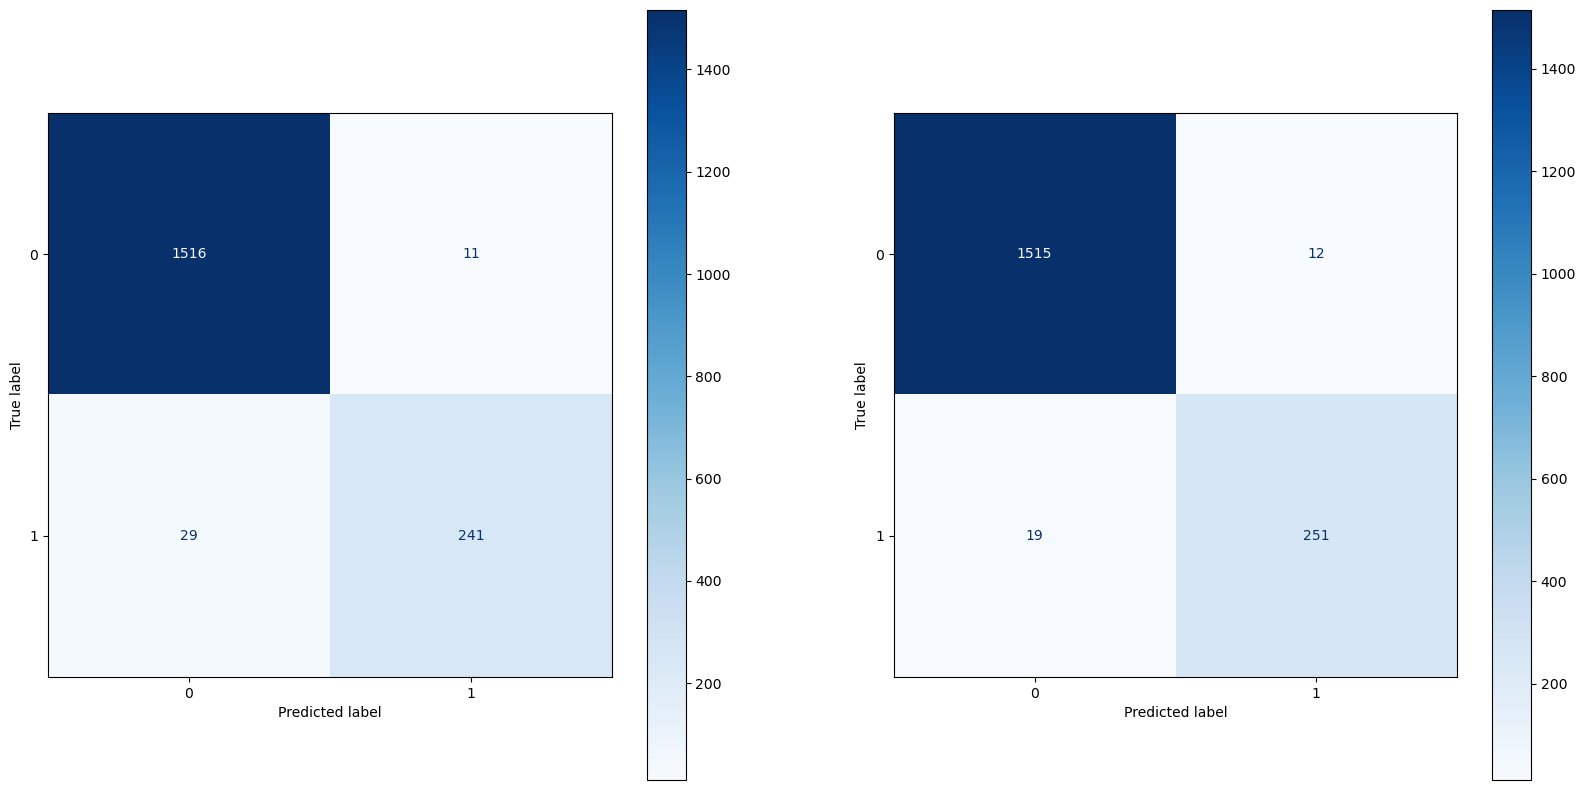

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

rf_sub_cm = confusion_matrix(y_rfsub_test, rf_sub_predictions)
xgb_sub_cm = confusion_matrix(y_xgbsub_test, xgb_sub_predictions)

fig, ax = plt.subplots(1,2,figsize=(20,10))
rf_sub_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_sub_cm, display_labels=rf_sub.classes_)
xgb_sub_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_sub_cm, display_labels=xgb_sub.classes_)
ax[0] = rf_sub_cm_display.plot(ax=ax[0], cmap=plt.cm.Blues)
ax[1] = xgb_sub_cm_display.plot(ax=ax[1], cmap=plt.cm.Blues)
plt.show()

In [60]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, GridSearchCV

kf = KFold(n_splits=10, random_state=42, shuffle=True)

imba_rf_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())
imba_xgb_pipeline = make_pipeline(SMOTE(random_state=42), XGBClassifier())
imba_xgb_pipeline_no_smote = make_pipeline(XGBClassifier())



In [16]:
params = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [4, 6, 8, 10],
    'random_state': [42]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba_rf = GridSearchCV(imba_rf_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_rf.fit(X_rfsub_train, y_rfsub_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 8, 10],
                         'randomforestclassifier__n_estimators': [800, 1000,
                                                                  1200],
                         'randomforestclassifier__random_state': [42]},
             return_train_score=True, scoring='f1')

In [17]:
print("Best Parameters {}".format(grid_imba_rf.best_params_))
print("Best Score {}".format(grid_imba_rf.best_score_))

Best Parameters {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 1200, 'randomforestclassifier__random_state': 42}
Best Score 0.9250724985444542


In [32]:
params = {
    'eta': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [4, 6, 8, 10],
    'random_state': [42]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba_xgb = GridSearchCV(imba_xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_xgb.fit(X_xgbsub_train, y_xgbsub_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=No...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__eta': [0.01, 0.1, 0.2, 0.3, 0.4],
                         'xgbclassifier__max_depth': [4, 6, 8, 10],
                         'xgbclassifier__random_state': [42]},
             return_train_score=True, scoring='f1')

In [27]:
print("Best Parameters {}".format(grid_imba_xgb.best_params_))
print("Best Score {}".format(grid_imba_xgb.best_score_))

Best Parameters {'xgbclassifier__eta': 0.4, 'xgbclassifier__max_depth': 4, 'xgbclassifier__random_state': 42}
Best Score 0.9403966279409076


In [28]:
xgb_sub_avg_time_features = features[selected_feat_xgb].drop(columns=['Time Diff between first and last (Mins)'])
xgb_sub_avg_time_features = xgb_sub_avg_time_features.join(features[['Avg min between sent tnx', 'Avg min between received tnx']])
X_xgbsubavg_train, X_xgbsubavg_test, y_xgbsubavg_train, y_xgbsubavg_test = train_test_split(xgb_sub_avg_time_features, fraud_labels, test_size=0.2, random_state=42)
xgb_subavg = XGBClassifier()
xgb_subavg.fit(X_xgbsubavg_train, y_xgbsubavg_train)
xgb_subavg_predictions = xgb_subavg.predict(X_xgbsubavg_test)
accuracy_xgb_subavg = accuracy_score(y_xgbsubavg_test, xgb_subavg_predictions)
print("XGBoost All Features Accuracy: " + str(accuracy_xgb))
print("XGBoost Sub Features Accuracy: " + str(accuracy_xgb_subavg))

xgb_subavg_f1 = f1_score(y_xgbsubavg_test, xgb_subavg_predictions)
print("XGBoost Sub Features F1 Score: " + str(xgb_subavg_f1))

XGBoost All Features Accuracy: 0.9833055091819699
XGBoost Sub Features Accuracy: 0.9816360601001669
XGBoost Sub Features F1 Score: 0.9383177570093457


With SMOTE

In [35]:
params = {
    'eta': [0.2, 0.3, 0.4, 0.5],
    'max_depth': [2, 4, 6],
    'random_state': [42],
    'min_child_weight': [1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [0, 0.01]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba_xgb_avg = GridSearchCV(imba_xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_xgb_avg.fit(X_xgbsubavg_train, y_xgbsubavg_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=No...
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1.0],
                         'xgbclassifier__eta': [0.2, 0.3, 0.4, 0.5],
                         'xgbclassifier__max_depth': [2, 4, 6],
                         'xgbclassifier__min_child_weight': [1, 5],
                         'xgbclassifier__random_state': [42],
                         'xgbclassifier__reg_alpha': [0, 0.01],
                         'xgbclassifier__reg_lambda': [0, 0.01],
                         'xgbclassifier__subsample': [0.8, 1.0]},
             return_train_score=True, scoring='f1')

In [36]:
print("Best Parameters {}".format(grid_imba_xgb_avg.best_params_))
print("Best Score {}".format(grid_imba_xgb_avg.best_score_))

Best Parameters {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__eta': 0.4, 'xgbclassifier__max_depth': 6, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__random_state': 42, 'xgbclassifier__reg_alpha': 0.01, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__subsample': 1.0}
Best Score 0.9410969777372793


No Time Features

In [79]:
xgb_no_time_features = features[selected_feat_xgb].drop(columns=['Time Diff between first and last (Mins)'])
X_notimefeat_train, X_notimefeat_test, y_notimefeat_train, y_notimefeat_test = train_test_split(xgb_no_time_features, fraud_labels, test_size=0.2, random_state=42)
xgb_notime_feat = XGBClassifier()
xgb_notime_feat.fit(X_notimefeat_train, y_notimefeat_train)
xgb_notimefeat_predictions = xgb_notime_feat.predict(X_notimefeat_test)
accuracy_xgb_notime_feat = accuracy_score(y_notimefeat_test, xgb_notimefeat_predictions)
print("XGBoost All Features Accuracy: " + str(accuracy_xgb))
print("XGBoost Sub Features Accuracy: " + str(accuracy_xgb_notime_feat))

xgb_notimefeat_f1 = f1_score(y_notimefeat_test, xgb_notimefeat_predictions)
print("XGBoost Sub Features F1 Score: " + str(xgb_notimefeat_f1))

XGBoost All Features Accuracy: 0.9833055091819699
XGBoost Sub Features Accuracy: 0.9755147468002225
XGBoost Sub Features F1 Score: 0.9153846153846154


In [82]:
params = {
    'eta': [0.2, 0.3, 0.4, 0.5],
    'max_depth': [2, 4, 6],
    'random_state': [42],
    # 'min_child_weight': [1, 5],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'reg_alpha': [0, 0.01],
    # 'reg_lambda': [0, 0.01]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba_xgb_notime = GridSearchCV(imba_xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_xgb_notime.fit(X_notimefeat_train, y_notimefeat_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=No...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__eta': [0.2, 0.3, 0.4, 0.5],
                         'xgbclassifier__max_depth': [2, 4, 6],
                         'xgbclassifier__random_state': [42]},
             return_train_score=True, scoring='f1')

In [83]:
print("Best Parameters {}".format(grid_imba_xgb_notime.best_params_))
print("Best Score {}".format(grid_imba_xgb_notime.best_score_))

Best Parameters {'xgbclassifier__eta': 0.2, 'xgbclassifier__max_depth': 6, 'xgbclassifier__random_state': 42}
Best Score 0.927558246735592


Sample for accounts with 'Time Diff between first and last (Mins)' =< 1 month in minutes

In [119]:
one_month_features = xgb_sub_features[xgb_sub_features['Time Diff between first and last (Mins)'] < 43200]
one_month_fraud_labels = fraud_labels[xgb_sub_features['Time Diff between first and last (Mins)'] < 43200] 
X_onemonth_train, X_onemonth_test, y_onemonth_train, y_onemonth_test = train_test_split(one_month_features, one_month_fraud_labels, test_size=0.2, random_state=42)
xgb_onemonth = XGBClassifier()
xgb_onemonth.fit(X_onemonth_train, y_onemonth_train)
xgb_onemonth_predictions = xgb_onemonth.predict(X_onemonth_test)
accuracy_xgb_onemonth = accuracy_score(y_onemonth_test, xgb_onemonth_predictions)
print("XGBoost All Features Accuracy: " + str(accuracy_xgb))
print("XGBoost Sub Features Accuracy: " + str(accuracy_xgb_onemonth))

xgb_onemonth_f1 = f1_score(y_onemonth_test, xgb_onemonth_predictions)
print("XGBoost Sub Features F1 Score: " + str(xgb_onemonth_f1))


XGBoost All Features Accuracy: 0.9833055091819699
XGBoost Sub Features Accuracy: 0.985663082437276
XGBoost Sub Features F1 Score: 0.9675675675675676


In [125]:
params = {
    'eta': [0.2, 0.3, 0.4, 0.5],
    'max_depth': [2, 4, 6],
    'random_state': [42],
    'min_child_weight': [1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [0, 0.01]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_imba_xgb_onemonth = GridSearchCV(imba_xgb_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_xgb_onemonth.fit(X_onemonth_train, y_onemonth_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=No...
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1.0],
                         'xgbclassifier__eta': [0.2, 0.3, 0.4, 0.5],
                         'xgbclassifier__max_depth': [2, 4, 6],
                         'xgbclassifier__min_child_weight': [1, 5],
                         'xgbclassifier__random_state': [42],
                         'xgbclassifier__reg_alpha': [0, 0.01],
                         'xgbclassifier__reg_lambda': [0, 0.01],
                         'xgbclassifier__subsample': [0.8, 1.0]},
             return_train_score=True, scoring='f1')

In [126]:
print("Best Parameters {}".format(grid_imba_xgb_onemonth.best_params_))
print("Best Score {}".format(grid_imba_xgb_onemonth.best_score_))

Best Parameters {'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__eta': 0.2, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__random_state': 42, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__reg_lambda': 0.01, 'xgbclassifier__subsample': 0.8}
Best Score 0.9651751679671434


XGBoost Sub Features F1 Score: 0.9516129032258065


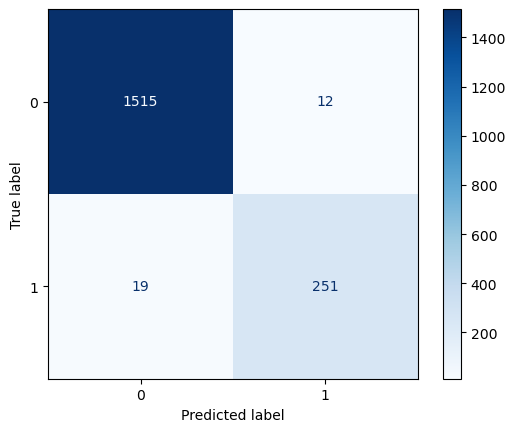

In [127]:
#create model with best parameters
xgb_onemonth_best = XGBClassifier(colsample_bytree=1, eta=0.2, max_depth=4, min_child_weight=1, random_state=42, reg_alpha=0, reg_lambda=0.01, subsample=0.8)
xgb_onemonth_best.fit(X_onemonth_train, y_onemonth_train)
xgb_onemonth_best_predictions = xgb_onemonth_best.predict(X_onemonth_test)
#f1 score
xgb_onemonth_best_f1 = f1_score(y_onemonth_test, xgb_onemonth_best_predictions)
print("XGBoost Sub Features F1 Score: " + str(xgb_onemonth_best_f1))

#plot confusion matrix
xgb_onemonth_best_cm = confusion_matrix(y_onemonth_test, xgb_onemonth_best_predictions)
xgb_onemonth_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_onemonth_best_cm, display_labels=xgb_onemonth_best.classes_)
xgb_sub_best_cm_display.plot(cmap=plt.cm.Blues)

#save model to pickle file
import pickle
pickle.dump(xgb_onemonth_best, open("xgb_model_onemonth.pickle.dat", "wb"))

Save model with no time features

[18:14:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "xgbclassifier__eta", "xgbclassifier__max_depth", "xgbclassifier__random_state" } are not used.

XGBoost Sub Features F1 Score: 0.9383177570093457


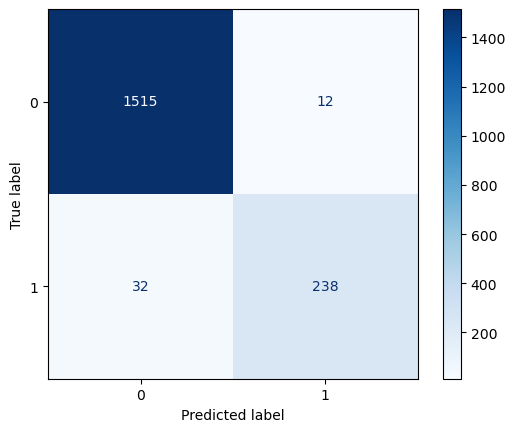

In [85]:
#create model with best parameters
xgb_notime_best = XGBClassifier(**grid_imba_xgb_notime.best_params_)
xgb_notime_best.fit(X_notimefeat_train, y_notimefeat_train)
xgb_notime_best_predictions = xgb_notime_best.predict(X_notimefeat_test)
#f1 score
xgb_subavg_best_f1 = f1_score(y_notimefeat_test, xgb_notime_best_predictions)
print("XGBoost Sub Features F1 Score: " + str(xgb_subavg_best_f1))

#plot confusion matrix
xgb_notime_best_cm = confusion_matrix(y_notimefeat_test, xgb_notime_best_predictions)
xgb_notime_best_cm_display = ConfusionMatrixDisplay(confusion_matrix=xgb_notime_best_cm, display_labels=xgb_notime_best.classes_)
xgb_notime_best_cm_display.plot(cmap=plt.cm.Blues)

#save model to pickle file
import pickle
pickle.dump(xgb_notime_best, open("xgb_model_no_time.pickle.dat", "wb"))

In [63]:
# Assuming imba_rf_pipeline is your pipeline with SMOTE and RandomForestClassifier
smote_step = imba_rf_pipeline.named_steps['smote']
# Apply SMOTE to get the sampled dataset
X_smote, y_smote = smote_step.fit_resample(X_xgbsubavg_train, y_xgbsubavg_train)

# Check the length of the sampled dataset
presampled_length = len(X_xgbsubavg_train)
sampled_length = len(X_smote)

sampled_y_flags_1 = y_smote[y_smote == 1]
original_y_flags_1 = y_xgbsubavg_train[y_xgbsubavg_train == 1]

print("Original Number of Fraud Transactions: ", len(original_y_flags_1))
print("Sampled Number of Fraud Transactions: ", len(sampled_y_flags_1))
print("Original Dataset Length:", presampled_length)
print("Sampled Dataset Length:", sampled_length)

Original Number of Fraud Transactions:  1080
Sampled Number of Fraud Transactions:  6104
Original Dataset Length: 7184
Sampled Dataset Length: 12208


In [128]:
xgb_model = pickle.load(open("xgb_model_onemonth.pickle.dat", "rb"))
accounts_df = pd.read_parquet("data/parquet_files/account_df.parquet")

accounts_features = accounts_df[['time_difference_in_minutes', 'num_unique_erc20tokens_out', 'min_erc20token_in',
                                 'total_outgoing_erc20eth', 'total_erc_20_tnx', 'total_incoming_eth', 'unique_received_transactions',
                                 'total_tx_with_contracts', 'contracts_created', 'outgoing_tx_count']]

accounts_features = accounts_features.rename(columns={'time_difference_in_minutes': 'Time Diff between first and last (Mins)', 'num_unique_erc20tokens_out': ' ERC20 uniq sent token name',
                                                      'min_erc20token_in': ' ERC20 min val rec', 'total_outgoing_erc20eth': ' ERC20 total ether sent', 'total_erc_20_tnx' : ' Total ERC20 tnxs', 'total_incoming_eth' : 'total ether received',
                                                      'unique_received_transactions' : 'Unique Received From Addresses', 'total_tx_with_contracts' : 'total transactions (including tnx to create contract',
                                                      'contracts_created' : 'Number of Created Contracts', 'outgoing_tx_count' : 'Sent tnx'})
#rearange columns into ['Sent tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'total transactions (including tnx to create contract', 'total ether received', ' Total ERC20 tnxs', ' ERC20 total ether sent', ' ERC20 min val rec', ' ERC20 uniq sent token name', 'Avg min between sent tnx', 'Avg min between received tnx']
accounts_features = accounts_features[['Time Diff between first and last (Mins)', 'Sent tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'total transactions (including tnx to create contract', 'total ether received', ' Total ERC20 tnxs', ' ERC20 total ether sent', ' ERC20 min val rec', ' ERC20 uniq sent token name']]
#choose all but last 2 columns
predictions = xgb_model.predict(accounts_features)

In [129]:
accounts_df['Predictions'] = predictions

Percentage of Fraud Accounts:  30.23 %
Percentage of Non-Fraud Accounts:  69.77 %
Number of Fraud Accounts:  1760798
Number of Non-Fraud Accounts:  4064200


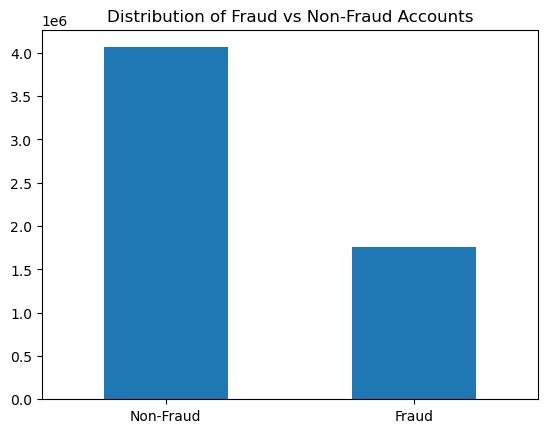

In [130]:
#show proportion of fraud vs non-fraud accounts
accounts_df['Predictions'].value_counts().plot(kind='bar')
plt.title("Distribution of Fraud vs Non-Fraud Accounts")
#rename x label ticks
plt.xticks([0,1], ["Non-Fraud", "Fraud"], rotation=0)

#print percentage of fraud vs non-fraud accounts
print("Percentage of Fraud Accounts: ", round(accounts_df['Predictions'].value_counts()[1]/len(accounts_df) * 100,2), "%")
print("Percentage of Non-Fraud Accounts: ", round(accounts_df['Predictions'].value_counts()[0]/len(accounts_df) * 100,2), "%")

#print number of fraud vs non-fraud accounts
print("Number of Fraud Accounts: ", accounts_df['Predictions'].value_counts()[1])
print("Number of Non-Fraud Accounts: ", accounts_df['Predictions'].value_counts()[0])

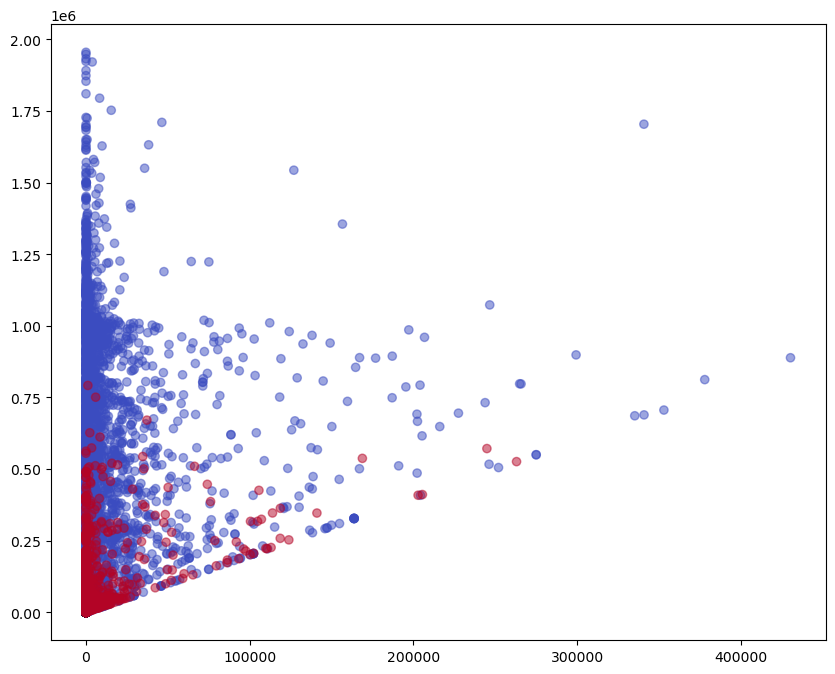

In [143]:
transaction_data_comp = transaction_data[['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract']] 
summary_transaction_data_comp = transaction_data_comp.describe()
one_month_transaction_data = transaction_data[transaction_data['Time Diff between first and last (Mins)'] < 43200]
one_month_transaction_data = one_month_transaction_data[['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract']] 
summary_one_month_transaction_data = one_month_transaction_data.describe()
transaction_data_non_fraud = transaction_data[transaction_data['FLAG'] == 0]
transaction_data_fraud = transaction_data[transaction_data['FLAG'] == 1]

summary_non_fraud = transaction_data_non_fraud.describe()
summary_none_fraud = summary_non_fraud[['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract']]
summary_fraud = transaction_data_fraud.describe()
summary_fraud = summary_fraud[['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'total transactions (including tnx to create contract']]
summary_transaction_data = accounts_df.describe()
summary_transaction_data = summary_transaction_data[['avg_time_diff_out_minutes', 'avg_time_diff_in_minutes', 'time_difference_in_minutes', 'total_tx_with_contracts']]

comparison = pd.concat([summary_transaction_data_comp, summary_none_fraud, summary_fraud, summary_one_month_transaction_data, summary_transaction_data], axis=1)
display(comparison)

#plot av
plt.figure(figsize=(10, 8))
plt.scatter(transaction_data['Avg min between sent tnx'], transaction_data['Time Diff between first and last (Mins)'], c=transaction_data['FLAG'], cmap='coolwarm', alpha=0.5)

In [146]:
potential_fraud = accounts_df[accounts_df['Predictions'] == 1]
potential_fraud.sort_values(by=['time_difference_in_minutes'], ascending=False)

,address_id,outgoing_tx_count,incoming_tx_count,time_difference_in_minutes,contracts_created,total_tx_with_contracts,unique_received_transactions,total_incoming_eth,total_erc_20_tnx,total_outgoing_erc20eth,min_erc20token_in,num_unique_erc20tokens_out,avg_time_diff_out_minutes,avg_time_diff_in_minutes,Predictions
5148045,5011592,1,677372,43199.450000,0,677373,254095,0.712000,3,0.0,68.288803,0,0.0,0.063775,1
5195193,5494969,0,27940,43199.450000,0,27940,10124,0.000000,2,0.0,3.913295,0,0.0,1.546206,1
4803469,1487524,0,16231,43199.416667,0,16231,14553,0.964775,1,0.0,3033.000000,0,0.0,2.661702,1
3444566,5469322,0,72545,43199.416667,0,72545,36301,0.100000,4,0.0,5.344118,0,0.0,0.595493,1
349673,3567944,0,8177,43199.250000,0,8177,2426,0.000000,4,0.0,0.000000,0,0.0,5.283666,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095585,1890955,0,1,0.000000,0,1,1,0.000000,1,0.0,100000.000000,0,0.0,0.000000,1
3095587,1891023,0,1,0.000000,0,1,1,0.000000,1,0.0,93.000000,0,0.0,0.000000,1
3095589,1891048,0,1,0.000000,0,1,1,0.000000,1,0.0,116.000000,0,0.0,0.000000,1
3095594,1891078,0,1,0.000000,0,1,1,0.000000,1,0.0,25.000000,0,0.0,0.000000,1
